## Student's t-test

We will explore three different hypothesis templates---formulations of hypotheses, significance levels, test statistics, and a method to draw conclusions that they have been standardized in statistics.  

They are all different versions of Student's t-test:a one-sample t-test, paired t-test, and two-sample t-test. 
For each test we'll define the null and alternative hypothesis and discuss the test statistic used. 

We'll end with a discussion about the (in)famous pvalue.  

### One sample t-test

The one sample t-test is used to compare the mean of a single set of observations to a constant value. 
The one sample t-test can answer statements like "the average value of our data is quite different than the constant value X".

#### Hypothesis:

To make a statistical claim that the true population mean of our data differs from a constant, assigned the symbol $\mu_{constant}$, we define our null hypothesis so that the population mean and constant are equal.   

A two-sided test defines the alternative hypothesis to be that the population mean and constant are not equal. 

\begin{align}
    H_{\text{null}} &: \mu_{Sample} = \mu_{constant} \\
    H_{\text{alte}} &: \mu_{Sample} \neq \mu_{constant} \\
\end{align}

#### Signficance level:

Lets define a significance level of $0.05$. 
If the probability the data was generated given the null hypothesis is true is less than 0.05 then we will reject our null hypothesis in favor of the alternative hypothesis. 

But how do we measure whether the data could have been generated if the null hypothesis were true?
We build a test statistic and a distribution for the possible test statistics that we could have computed given the null hypothesis was true. 

#### Test statistic

The one sample t-test defines a test statistic that measures the difference between the sample mean (an estimate for the population mean) and the constant value defined in the null hypothsis normalized by the standard error.
The t-statistic is the number of standard errors the sampe mean is from the assumed, null population mean.

Let the data be $X = [x_{1},x_{2},x_{3},\cdots,x_{N}]$.
The t-statistic is

$$
    t = \frac{ \bar{x} - \mu_{constant}}{ s \Big/ \sqrt{N} }
$$

where $\bar{x}$ is the sample mean, $\mu_{constant}$ is the assumed null constant, $s$ is the sample standard deviation, and $N$ is the number of observations. 

#### Pvalue and evaluting your data

We need a distribution of possible test statistics given the null hyptheis were true to measure whether our observed test statistic is different from a test statistic we may have computed if the null hypothesis were true. 

How do we figure out the null hypothesis for $t$ above?
Lets **assume** the mean has a normal distribution.
This is a reasonable assumption because of the Central Limit Theorem. 

---
### Aside

##### Shifting

If $X \sim \mathcal{N}(\mu,\sigma^{2})$ then a new random variable $Y = X + C$ is distributed $Y \sim \mathcal{N}(\mu+C,\sigma^{2})$.

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


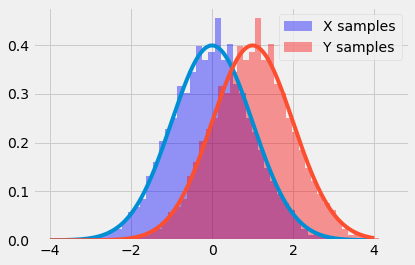

In [35]:
import scipy.stats
import numpy as np

c=1
domain = np.linspace(-4,4,500)
X = scipy.stats.norm(0,1).pdf
Y = scipy.stats.norm(c,1).pdf

xsamples = np.random.normal(0,1,5*10**3)
ysamples = []

for x in xsamples:
    y = x+c
    ysamples.append(y)

plt.style.use("fivethirtyeight")
fig,ax = plt.subplots()

sns.distplot(xsamples,kde=False,label="X samples"
             ,color="blue", norm_hist=True,ax=ax)
sns.distplot(ysamples,kde=False,label="Y samples"
             ,color="red", norm_hist=True,ax=ax)

ax.plot(domain,X(domain))
ax.plot(domain,Y(domain))

ax.legend()


##### Scaling
If $X \sim \mathcal{N}(\mu,\sigma^{2})$ then a new random variable $Y = cX$ is distributed $Y \sim \mathcal{N}(\mu,\left(c\sigma\right)^{2})$.

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


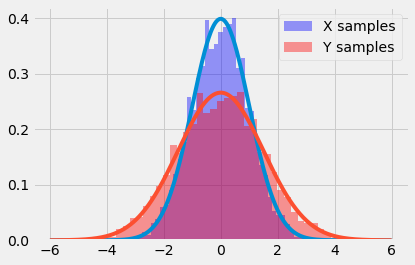

In [20]:
import scipy.stats
import numpy as np

c=1.5
domain = np.linspace(-6,6,500)
X = scipy.stats.norm(0,1).pdf
Y = scipy.stats.norm(0,c).pdf

xsamples = np.random.normal(0,1,5*10**3)
ysamples = []

for x in xsamples:
    y = c*x
    ysamples.append(y)

plt.style.use("fivethirtyeight")
fig,ax = plt.subplots()

sns.distplot(xsamples,kde=False,label="X samples"
             ,color="blue", norm_hist=True,ax=ax)
sns.distplot(ysamples,kde=False,label="Y samples"
             ,color="red", norm_hist=True,ax=ax)

ax.plot(domain,X(domain))
ax.plot(domain,Y(domain))

ax.legend()


---

Now that we know about shifts and scaling, lets get back to the null distribution of the t-statistic. 

If we assume $\bar{x}$ is normally distributed and we assume the null hypothesis is true, than the distribution of the sample mean should be centered on $\mu_{constant}$

$$
 \bar{x} \sim \mathcal{N}\left(\mu_{constant}, \dfrac{\sigma^{2}}{N} \right) 
$$

Then the random variable $Y = \bar{x} - \mu_{constant}$ is equal to 

\begin{align}
    \bar{x} \sim \mathcal{N}\left(\mu_{constant}, \dfrac{\sigma^{2}}{N} \right) \\
   Y =  \bar{x} - \mu_{constant} \sim \mathcal{N}\left(\mu_{constant} - \mu_{constant}, \dfrac{\sigma^{2}}{N} \right)\\
   Y =  \bar{x} - \mu_{constant} \sim \mathcal{N} \left(0, \dfrac{\sigma^{2}}{N} \right)\\
\end{align}

To get to the t-stat we need to divide by (multiply by the reciprocal of)  $s \Big/ \sqrt{N}$ 
Let T = $Y \times \sqrt{N} \Big / s$ then 

\begin{align}
   T &\sim \mathcal{N} \left(0, \dfrac{\sigma^{2}}{N} \times \dfrac{N}{s^2} \right)\\
   T &\sim \mathcal{N} \left(0, \dfrac{\sigma^{2}}{s^2} \right)\\
\end{align}

### The Z-test

If we **assume** that the estimated sample variance $s^{2}$ is a good approximation of the population variance $\sigma^{2}$ then the distribtuion of our t-stat given the null hypothesis is true equals

\begin{align}
   T &\sim \mathcal{N} \left(0, \dfrac{\sigma^{2}}{s^2} \right)\\
   T &\sim \mathcal{N} \left(0, \dfrac{\sigma^{2}}{\sigma^2} \right)\\
   Z &\sim \mathcal{N} \left(0, 1 \right)\\
\end{align}

We can compare our observed test statistic

\begin{align}
    z &= \frac{ \bar{x} - \mu_{constant}}{ s \Big/ \sqrt{N} }\\
      &= \sqrt{N} \left( \frac{ \bar{x} - \mu_{constant}}{ s } \right)\\
\end{align}

to a Normal distribution with mean 0 and standard deviation 1---a **Standard Normal Distribution**. 

Let's look at an example. The COVIDtracking project has recorded the number of new confirmed cases per day in the US since 2020-01-22. A histogram of the number of new cases from 2020-01-22 up until 2020-11-03 is shown below. 

Text(0, 0.5, 'Frequency')

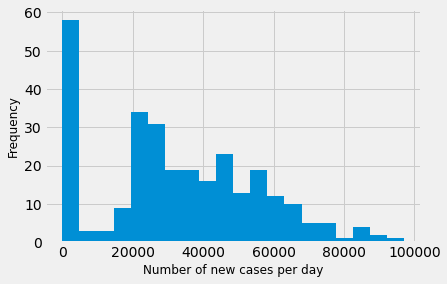

In [34]:
import pandas as pd
d = pd.read_csv("https://api.covidtracking.com/v1/us/daily.csv")
numOfNewCases = d.positiveIncrease.values

fig,ax = plt.subplots()
ax.hist(numOfNewCases,20)

ax.set_xlabel("Number of new cases per day",fontsize=12)
ax.set_ylabel("Frequency",fontsize=12)

Lets ask if the average number of new cases in the US is statistically different than 10,000.

##### Hypotheses

\begin{align}
    H_{\text{null}} &: \mu_{Sample}    = 10,000 \\
    H_{\text{alte}} &: \mu_{Sample} \neq 10,000 \\
\end{align}

##### Significance level

We will set our confidence level at $\alpha = 0.01$. 

To compute our test statistic we need the sample mean and standard deviation

In [37]:
import numpy as np
avg = np.mean(numOfNewCases)
print("Avg. number of new cases = {:.2f}".format(avg))

std = np.std(numOfNewCases)
print("Std. number of new cases = {:.2f}".format(std))

N = len(numOfNewCases)
print("Number of observations = {:d}".format(N))


Avg. number of new cases = 32480.16
Std. number of new cases = 22881.29
Number of observations = 287


##### test statistic

\begin{align}
    t &= \sqrt{287} \times \frac{32,480.16 - 10,000}{ 22,881.29}\\
      &= 16.94 \times 0.982 = 16.63
\end{align}

Our test statistic is $16.63$ and we found that, given our null hypothesis and assuming the estimated standard deviation was a very good approximation for the true populaiton standrad deviation, our test statistics should follow a $t_{\text{null}} \sim \mathcal{N}(0,1)$ standard notmal distribution. 

But we did not discuss what to compute from this distribution that could either support or deny our null hypothesis.

The pvalue. The pvalue is the probability of finding an observed test-statistic or an observed test-statistic "more extreme" given our null hypothesis. 
The pvalue computes the probability that the null hypotheisis could have generated our observed data.


For the Z-test, the pvalue for a two-sided test is computed as follows:

\begin{align}
    p( Z > z \text{ or } Z > -z) & = p( Z > z) + p( Z < z) \text{  why?} \\ 
                                 & = 2 \times p( Z > z) \text{  why?} \\ 
\end{align}

and in our example 

\begin{align}
    2\times p(Z>16.63) \approx 10^{-20}
\end{align}

The probability of a t-statistic that is 16.63 or greater, or -16.63 or less, is approximately $10^{-20}$.
This probability is smaller than our significance level of 0.01 and so we reject the null hypothesis: it is unlikely the true population mean US number of new COVID-19 cases is 10,000. 

This was a one sample Z-test. 
What about the One sample t-test?

The one sample t-test does **not** assume the sample standard deviation is a replacement for the true population standard deviation.
Instead the sample standard deviation is thought to have it's own distribution and becase of our uncertainty in $s$ as an estimate of $\sigma$ we have a different distribution. 

Let's look at the difference between having the exact population parameters and computing the sample parameters.

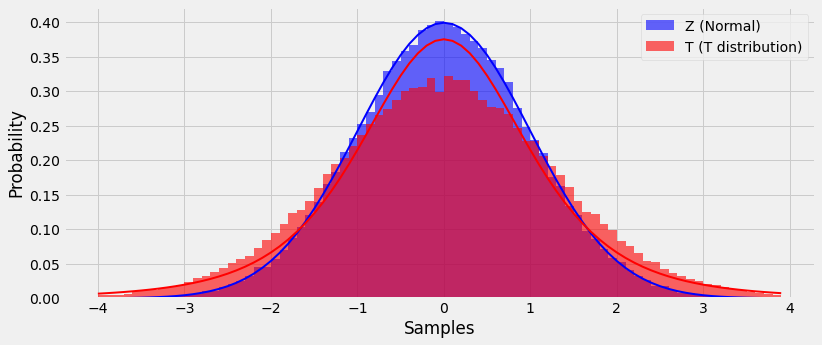

In [89]:
mu    = 0
sigma = 2
N     = 4

normSamples  = []
ttestSamples = []

stds = []
for _ in range(10*10**4):
    normalSample = np.random.normal(mu,sigma/np.sqrt(N)) # exact distribution of the mena of X (CLT)
    normSamples.append(normalSample)
    
    generatedData = np.random.normal(mu,sigma,N)
    
    std     = np.std(generatedData)
    tSample = np.random.normal(np.mean(generatedData),std/np.sqrt(N))
    ttestSamples.append( tSample )

    stds.append(std)
    
domain = np.arange(-4,4,0.1)

fig,ax = plt.subplots()

Z=scipy.stats.norm(mu,sigma/np.sqrt(N)).pdf
T=scipy.stats.t(df=4,loc=mu,scale=sigma/np.sqrt(N)).pdf

ax.hist( normSamples , domain, alpha=0.60, color="blue", density=True, label = "Z (Normal)" )
ax.hist( ttestSamples, domain, alpha=0.60, color="red" , density=True, label = "T (T distribution)")

ax.plot( domain, Z(domain), color="blue", lw=2  )
ax.plot( domain, T(domain), color="red" , lw=2  )

ax.legend()

ax.set_xlabel("Samples")
ax.set_ylabel("Probability")

ax.legend()

fig.set_size_inches(12,5)

The t statistic has more probability assigned to extreme values. 
When a distribution places more probabilty on extreme values compared to a normal distribution it is called **heavy tailed**.
The uncertainity in the standard deviation causes the distribution of t-statistic, called the t-distribution, to place a higher probability on extreme values and makes it harder to reject the null hypothesis.

Let's compare the pvalue from a Z-test to a pvalue from a t-test.
Rather than compare the observed average number of new cases in the US for all observations, we can look at the past 7 observations and compare our observed data to a null hypothesis mean of 40,000.

In [132]:
import pandas as pd
d = pd.read_csv("https://api.covidtracking.com/v1/us/daily.csv")
d = d.iloc[:40,:]

numOfNewCases = d.positiveIncrease.values

avg = np.mean(numOfNewCases)
std = np.std(numOfNewCases)

stat = np.sqrt(7)*(avg - 40000)/std

# Z-test pvalue
pvalue_Z = 2*(1-scipy.stats.norm(0,1).cdf( stat  ))
print("Pvalue from Z-test  " + str(pvalue_Z) ) 

#t-test
pvalue_t = 2*(1-scipy.stats.t(40,0,1).cdf( stat  ))
print("Pvalue from t-test  " + str(pvalue_t))

Pvalue from Z-test  0.0018198586572069075
Pvalue from t-test  0.003366592394365542


Both tests would reject the null hypothesis, but the t-test assigns a larger probability to these extreme values.

### Paired t-test : the one sample t-test in disguise

The paired t-test asseses the average difference between the value of an observation at one point and the value of that observation at a different point. 
Often these are the same observation measured at two different time points, or two observations that have been matched and made more simialr to one another in some systematic way. 

#### Hypothesis

The null and alternative hypotheses for a paired t-test are

\begin{align}
    H_{\text{null}}: \delta_{\text{observed diff}} = \delta_{\text{null diff}} \\ 
    H_{\text{alte}}: \delta_{\text{observed diff}} \neq \delta_{\text{null diff}} \\ 
\end{align}

#### test statistic

and the test statistic is

\begin{align}
    t_{\text{paired}} &= \sqrt{N} \left( \frac{ \bar{\delta} - \delta_{\text{null diff}}}{ s_\text{pairs} } \right)\\
\end{align}

where $\delta_{\text{observed diff}}$ is the observed **paired** difference and  $\delta_{\text{null diff}}$ is the null, constant paired difference, and $s_\text{pairs}$ is the sample standard deviation of pairs. 

Lets look at an [example](https://www.sjsu.edu/faculty/gerstman/StatPrimer/paired.pdf). 

A cross-over trial investigated whether eating oat bran lowered serum cholesterol levels.
Fourteen (14) individuals were randomly assigned a diet that included either oat bran or corn
flakes. After two weeks on the initial diet, serum cholesterol were measured and the
participants were then “crossed-over” to the alternate diet. After two-weeks on the second diet,
cholesterol levels were once again recorded.

This example is from this link = https://www.sjsu.edu/faculty/gerstman/StatPrimer/paired.pdf

In [138]:
d = { "ptid":[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
     ,"corn":[4.61,6.42,5.40,4.54,3.98,3.82,5.01,4.34,3.80,4.56,5.35,3.89,2.25,4.24]
     ,"oat":[3.84,5.57,5.85,4.80,3.68,2.96,4.41,3.72,3.49,3.84,5.26,3.73,1.84,4.14]
}
d = pd.DataFrame(d)

d["pairedDiffs"] = d.corn - d.oat
print(d)

    ptid  corn   oat  pairedDiffs
0      1  4.61  3.84         0.77
1      2  6.42  5.57         0.85
2      3  5.40  5.85        -0.45
3      4  4.54  4.80        -0.26
4      5  3.98  3.68         0.30
5      6  3.82  2.96         0.86
6      7  5.01  4.41         0.60
7      8  4.34  3.72         0.62
8      9  3.80  3.49         0.31
9     10  4.56  3.84         0.72
10    11  5.35  5.26         0.09
11    12  3.89  3.73         0.16
12    13  2.25  1.84         0.41
13    14  4.24  4.14         0.10


Our hypothesis is that there will be zero average difference cholesterol levels from eating oats and corn.

\begin{align}
    H_{\text{null}} &: \delta_{\text{observed}} = 0 \\
    H_{\text{alte}} &: \delta_{\text{observed}} \neq 0 \\
\end{align}

In [149]:
meanPairedDiff = d.pairedDiffs.mean()
stdPairedDiff  = d.pairedDiffs.std()

print("Mean paired diff = {:.2f}".format(meanPairedDiff))
print("Std paired diff  = {:.2f}".format(stdPairedDiff))

t = np.sqrt(len(d))*(meanPairedDiff - 0) / stdPairedDiff
print("T-test = {:.2f}".format(t))

pvalue = 2*(1-scipy.stats.t(len(d)-1,0,1).cdf(t))
print("pvalue = {:.2f}".format(pvalue))

Mean paired diff = 0.36
Std paired diff  = 0.41
T-test = 3.34
pvalue = 0.01
